# The 1st Assignment Pengolahan dan analisis Citra Digital

## Nama : Ihlasul Amal
## Nim : 24/551419/PPA/06974



#1.  IMPORT LIBRARY

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import numpy as np
import gdown


#2. FUNGSI DOWNSAMPLING

## a.  Downsampilng pada citra 4x4 -> 2x2 berdasarkan nilai max, median, mean

In [ ]:
# Fungsi Downsampling dengan Max, Median, Mean
def downsample_4x4_to_2x2(img, method='mean'):
    if img.shape != (4, 4):
        raise ValueError("Input harus 4x4")
    block_size = 2
    result = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            block = img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            if method == 'max':
                result[i, j] = np.max(block)
            elif method == 'median':
                result[i, j] = np.median(block)
            elif method == 'mean':
                result[i, j] = np.mean(block)
    return result

## b. Downsampilng citra 5x5 -> 3x3 berdasarkan nilai max, median, mean

In [ ]:
def downsample_5x5_to_3x3(img, method='mean'):
    if img.shape != (5, 5):
        raise ValueError("Input harus 5x5")

    indices = [(0,2), (2,4), (4,5)]
    result = np.zeros((3, 3))

    for i in range(3):
        for j in range(3):
            r_start, r_end = indices[i]
            c_start, c_end = indices[j]
            block = img[r_start:r_end, c_start:c_end]
            if method == 'max':
                result[i, j] = np.max(block)
            elif method == 'median':
                result[i, j] = np.median(block)
            elif method == 'mean':
                result[i, j] = np.mean(block)
    return result

# 3. FUNGSI UPSAMPLING

## Fungsi Upsampling 2x2 -> 4x4 dan Fungsi Upsampling 3x3->5x5 dengan menggunakan fungsi  nearest, bilinear dan bicubic



In [ ]:
# Fungsi Upsampling 2x2->4x4
def upsampling_2x2_to_4x4(img, method='nearest'):
    if img.shape != (2, 2):
        raise ValueError("Input harus 2x2")
    if method == 'nearest':
        # Ulangi setiap pixel 2x2 kali
        return np.repeat(np.repeat(img, 2, axis=0), 2, axis=1)
    elif method == 'bilinear':
        return resize(img, (4, 4), order=1, preserve_range=True, anti_aliasing=False)
    elif method == 'bicubic':
        return resize(img, (4, 4), order=3, preserve_range=True)

# Fungsi Upsampling 2x2->4x4
def upsampling_3x3_to_5x5(img, method='nearest'):
    if img.shape != (3, 3):
        raise ValueError("Input harus 3x3")
    if method == 'nearest':
        # Nearest neighbor: map 3 posisi ke 5 posisi
        scale = 5 / 3
        result = np.zeros((5, 5))
        for i in range(5):
            for j in range(5):
                src_i = int(i / scale)
                src_j = int(j / scale)
                result[i, j] = img[src_i, src_j]
        return result
    elif method == 'bilinear':
        return resize(img, (5, 5), order=1, preserve_range=True, anti_aliasing=False)
    elif method == 'bicubic':
        return resize(img, (5, 5), order=3, preserve_range=True)

# 4. DATA UJI

In [ ]:
# Citra contoh 4x4
img_4x4 = np.array([
    [10, 20, 30, 40],
    [50, 60, 70, 80],
    [90, 100, 110, 120],
    [130, 140, 150, 160]
], dtype=np.float32)

# Citra contoh 5x5
img_5x5 = np.array([
    [10, 20, 30, 40, 50],
    [60, 70, 80, 90, 100],
    [110, 120, 130, 140, 150],
    [160, 170, 180, 190, 200],
    [210, 220, 230, 240, 250]
], dtype=np.float32)


# 5. PROSES DOWNSAMPLING

### a. Down Sampling pada citra 4x4 -> 2x2

In [ ]:
print("=== DOWN SAMPLING ===\n")

print("Citra 4x4 asli:")
print(img_4x4)
print()

# Downsampling 4x4 -> 2x2
for method in ['mean', 'max', 'median']:
    ds_4x4 = downsample_4x4_to_2x2(img_4x4, method)

    if method == 'mean':
        ds_4x4 = np.round(ds_4x4).astype(int)  # Bulatkan ke integer
    else:

        ds_4x4 = np.round(ds_4x4).astype(int)

    print(f"4x4 -> 2x2 ({method.capitalize()}):")
    print(ds_4x4)
    print()


=== DOWN SAMPLING ===

Citra 4x4 asli:
[[ 10.  20.  30.  40.]
 [ 50.  60.  70.  80.]
 [ 90. 100. 110. 120.]
 [130. 140. 150. 160.]]

4x4 -> 2x2 (Mean):
[[ 35  55]
 [115 135]]

4x4 -> 2x2 (Max):
[[ 60  80]
 [140 160]]

4x4 -> 2x2 (Median):
[[ 35  55]
 [115 135]]



### b.  Down Sampling pada citra 5x5 -> 3x3


In [ ]:
print("Citra 5x5 asli:")
print(img_5x5)
print()

# Downsampling 5x5 -> 3x3
for method in ['mean', 'max', 'median']:
    ds_5x5 = downsample_5x5_to_3x3(img_5x5, method)

    # Bulatkan semua metode ke bilangan bulat
    if method == 'mean':
        ds_5x5 = np.round(ds_5x5).astype(int)
    else:
        ds_5x5 = np.round(ds_5x5).astype(int)

    print(f"5x5 -> 3x3 ({method.capitalize()}):")
    print(ds_5x5)
    print()

Citra 5x5 asli:
[[ 10.  20.  30.  40.  50.]
 [ 60.  70.  80.  90. 100.]
 [110. 120. 130. 140. 150.]
 [160. 170. 180. 190. 200.]
 [210. 220. 230. 240. 250.]]

5x5 -> 3x3 (Mean):
[[ 40  60  75]
 [140 160 175]
 [215 235 250]]

5x5 -> 3x3 (Max):
[[ 70  90 100]
 [170 190 200]
 [220 240 250]]

5x5 -> 3x3 (Median):
[[ 40  60  75]
 [140 160 175]
 [215 235 250]]



# 6. PROSES UPSAMPLING

### a. Proses Upsampling 2x2 -> 4x4

In [ ]:
print("\n=== UP SAMPLING ===\n")

# Upsampling 2x2 -> 4x4
ds_4x4 = downsample_4x4_to_2x2(img_4x4, 'mean')
print("Citra 2x2 (hasil downsampling mean 4x4):")
print(ds_4x4)
print()

for method in ['nearest', 'bilinear', 'bicubic']:
    us_4x4 = upsampling_2x2_to_4x4(ds_4x4, method)
    us_4x4_rounded = np.round(us_4x4).astype(int)  # Pembulatan normal ke bilangan bulat
    print(f"Upsample ke 4x4 ({method.capitalize()}):")
    print(us_4x4_rounded)
    print()


=== UP SAMPLING ===

Citra 2x2 (hasil downsampling mean 4x4):
[[ 35.  55.]
 [115. 135.]]

Upsample ke 4x4 (Nearest):
[[ 35  35  55  55]
 [ 35  35  55  55]
 [115 115 135 135]
 [115 115 135 135]]

Upsample ke 4x4 (Bilinear):
[[ 60  60  70  70]
 [ 60  60  70  70]
 [100 100 110 110]
 [100 100 110 110]]

Upsample ke 4x4 (Bicubic):
[[ 51  51  64  64]
 [ 51  51  64  64]
 [106 106 119 119]
 [106 106 119 119]]



### b. Up Sampling pada citra  3x3 -> 5x5

In [ ]:
print("\n=== UP SAMPLING ===\n")
# upsampling 3x3 -> 5x5
ds_3x3 = downsample_5x5_to_3x3(img_5x5, 'mean')
print("Citra 3x3 (hasil downsampling mean 5x5):")
print(ds_3x3)
print()

for method in ['nearest', 'bilinear', 'bicubic']:
    us_5x5 = upsampling_3x3_to_5x5(ds_3x3, method)
    us_5x5_rounded = np.round(us_5x5).astype(int)  # Pembulatan normal ke bilangan bulat
    print(f"upsampling ke 5x5 ({method.capitalize()}):")
    print(us_5x5_rounded)
    print()


=== UP SAMPLING ===

Citra 3x3 (hasil downsampling mean 5x5):
[[ 40.  60.  75.]
 [140. 160. 175.]
 [215. 235. 250.]]

upsampling ke 5x5 (Nearest):
[[ 40  40  60  60  75]
 [ 40  40  60  60  75]
 [140 140 160 160 175]
 [140 140 160 160 175]
 [215 215 235 235 250]]

upsampling ke 5x5 (Bilinear):
[[ 64  68  80  89  92]
 [ 84  88 100 109 112]
 [144 148 160 169 172]
 [189 193 205 214 217]
 [204 208 220 229 232]]

upsampling ke 5x5 (Bicubic):
[[ 47  51  66  78  80]
 [ 64  67  83  95  97]
 [141 145 160 172 174]
 [202 206 221 233 235]
 [213 216 231 244 246]]



 # 7. PENGUJIAN PADA DATA CITRA ASLI




## A. Load citra

⏬ Sedang mendownload gambar dari Google Drive...
✅ File 'jeruknipis2.jpg' sudah ada, skip download.


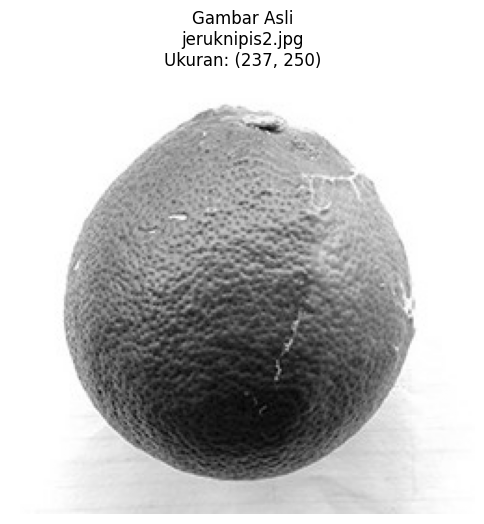

✅ Gambar berhasil dimuat: jeruknipis2.jpg
Ukuran asli: (237, 250)


In [ ]:
# === Konfigurasi Google Drive ===
file_id = "1nLZBfZFHHwT7AOkzRa_dKUm1dHQW_DWA"
output_filename = "jeruknipis2.jpg"
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# === Download gambar ===
print("⏬ Sedang mendownload gambar dari Google Drive...")
if os.path.exists(output_filename):
    print(f"✅ File '{output_filename}' sudah ada, skip download.")
else:
    try:
        gdown.download(url, output_filename, quiet=False)
    except Exception as e:
        print("❌ Gagal download:", e)
        exit()

# === Baca gambar grayscale ===
img = cv2.imread(output_filename, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("❌ Gagal membaca gambar.")
    exit()

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title(f"Gambar Asli\n{output_filename.split('/')[-1]}\nUkuran: {img.shape}")
plt.axis('off')
plt.show()

print(f"✅ Gambar berhasil dimuat: {output_filename}")
print(f"Ukuran asli: {img.shape}")


## B. Resize citra agar tidak terlalu besar


=== PIXEL CITRA 64x64 (HASIL RESIZE) ===
Ukuran: (64, 64)
5x5 tengah:
 [[122 133 135 136 126 134 136 120 117 129]
 [127 114 119 126 131 128 131 119 131 139]
 [108 111  96  99 114 133 112 127 119 119]
 [128 113 124 108  97  96  93  92  98 116]
 [108  97  75  90  83  90  98  79  92  77]
 [ 86  88  90  80  82  83  98 102  87  96]
 [ 70  72  78  67  78  88  92  76  88  78]
 [ 86  92  77  79  70  71  70  85  78  81]
 [ 79  62  75  82  79  76  86  82  85  82]
 [ 64  68  69  85  81  73  59  74  71  83]]


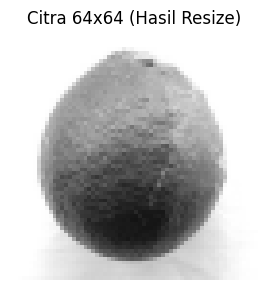

In [ ]:
# ✅ Resize ke 64x64 (citra awal hasil resize)
# =========================================================================
img_64x64 = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
img_64x64_float = img_64x64.astype(np.float32)

print("\n=== PIXEL CITRA 64x64 (HASIL RESIZE) ===")
print("Ukuran:", img_64x64.shape)
# Tampilkan hanya sebagian matriks agar tidak terlalu panjang
center = img_64x64[27:37, 27:37]         # 5×5 tengah
print("5x5 tengah:\n", center)

# === Tampilkan Citra 64x64 (TANPA angka piksel) ===
plt.figure(figsize=(3, 3))
plt.imshow(img_64x64, cmap='gray', vmin=0, vmax=255)
plt.title("Citra 64x64 (Hasil Resize)", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


## C. Fungsi downsampling

In [ ]:
def downsample_64x64_to_32x32(img, method='mean'):
    if img.shape != (64, 64):
        raise ValueError("Input harus 64x64")
    result = np.zeros((32, 32))
    for i in range(32):
        for j in range(32):
            block = img[i*2:(i+1)*2, j*2:(j+1)*2]  # Blok 2x2
            if method == 'mean':
                result[i, j] = np.mean(block)
            elif method == 'max':
                result[i, j] = np.max(block)
            elif method == 'median':
                result[i, j] = np.median(block)
    return np.round(result).astype(int)

# Hasil downsampling
down_mean = downsample_64x64_to_32x32(img_64x64_float, 'mean')
down_max  = downsample_64x64_to_32x32(img_64x64_float, 'max')
down_median = downsample_64x64_to_32x32(img_64x64_float, 'median')

# Tampilkan hanya sebagian matriks agar tidak terlalu panjang
print("\n=== DOWNSAMPLING 64x64 → 32x32 ===")
print("Mean (10×10 tengah):\n", down_mean[11:21, 11:21])
print("Max  (10×10 tengah):\n", down_max[11:21, 11:21])
print("Median (10×10 tengah):\n", down_median[11:21, 11:21])


=== DOWNSAMPLING 64x64 → 32x32 ===
Mean (10×10 tengah):
 [[160 160 155 160 170 160 154 141 136 148]
 [156 154 152 147 134 138 145 147 145 152]
 [157 146 136 138 136 125 118 125 142 154]
 [138 137 122 110 118 126 124 131 127 126]
 [121 111 116 102  94  94  90  91  94 100]
 [102 108  82  82  77  90  88  83  76 105]
 [ 93  76  81  76  78  76  82  80  88  98]
 [ 72  74  71  75  82  70  73  80  98  86]
 [ 74  76  70  50  52  58  67  63  90  76]
 [ 64  58  52  53  47  44  45  50  50  56]]
Max  (10×10 tengah):
 [[167 168 169 167 173 166 165 151 153 165]
 [172 166 177 168 143 145 167 160 152 173]
 [160 152 156 153 141 136 123 138 154 164]
 [147 154 135 119 131 133 131 147 157 152]
 [135 126 128 124 108  98  98 116 114 117]
 [110 128  96  90  82  98 102  96  81 125]
 [101  88  95  92  82  86  85  86  99 120]
 [ 86  88  78  83  85  75  78  90 130  99]
 [ 84  91  82  56  60  65  76  70 115  88]
 [ 72  67  62  60  54  52  51  63  65  71]]
Median (10×10 tengah):
 [[160 161 152 160 172 162 153 142 

## D. Fungsi Upsampling

In [ ]:
def upsample_64x64_to_128x128(img, method='nearest'):
    if method == 'nearest':
        return np.repeat(np.repeat(img, 2, axis=0), 2, axis=1)
    elif method == 'bilinear':
        return resize(img, (128, 128), order=1, preserve_range=True)
    elif method == 'bicubic':
        return resize(img, (128, 128), order=3, preserve_range=True)
    else:
        raise ValueError("Metode tidak didukung")

# Upsample dari citra 64x64 asli
up_nearest = upsample_64x64_to_128x128(img_64x64_float, 'nearest')
up_bilinear = upsample_64x64_to_128x128(img_64x64_float, 'bilinear')
up_bicubic = upsample_64x64_to_128x128(img_64x64_float, 'bicubic')

# Bulatkan ke bilangan bulat
up_nearest = np.round(up_nearest).astype(int)
up_bilinear = np.round(up_bilinear).astype(int)
up_bicubic = np.round(up_bicubic).astype(int)

# Tampilkan hanya sebagian matriks agar tidak terlalu panjang
print("\n=== UPSAMPLING 64x64 → 128x128 ===")
print("nearest (10×10 tengah):\n", up_nearest[59:69, 59:69])
print("bilinear (10×10 tengah):\n", up_bilinear[59:69, 59:69])
print("bicubic (10×10 tengah):\n", up_bicubic[59:69, 59:69])


=== UPSAMPLING 64x64 → 128x128 ===
nearest (10×10 tengah):
 [[ 96  99  99 114 114 133 133 112 112 127]
 [124 108 108  97  97  96  96  93  93  92]
 [124 108 108  97  97  96  96  93  93  92]
 [ 75  90  90  83  83  90  90  98  98  79]
 [ 75  90  90  83  83  90  90  98  98  79]
 [ 90  80  80  82  82  83  83  98  98 102]
 [ 90  80  80  82  82  83  83  98  98 102]
 [ 78  67  67  78  78  88  88  92  92  76]
 [ 78  67  67  78  78  88  88  92  92  76]
 [ 77  79  79  70  70  71  71  70  70  85]]
bilinear (10×10 tengah):
 [[103 102 103 108 113 120 120 111 110 116]
 [114 109 105 102 102 104 103 100  98 100]
 [110 106 101  96  94  94  94  94  93  90]
 [ 89  93  92  88  88  90  93  95  93  86]
 [ 81  85  86  84  84  87  91  96  95  88]
 [ 85  83  82  82  83  84  88  95  98  97]
 [ 84  79  78  80  82  83  87  93  96  96]
 [ 78  73  72  77  81  85  88  92  91  85]
 [ 76  72  72  74  78  82  84  86  84  80]
 [ 77  76  75  73  73  74  75  75  77  81]]
bicubic (10×10 tengah):
 [[101  99 100 105 115 125 

## E. Visualisasi

### a. Visualisasi Down Sampling

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

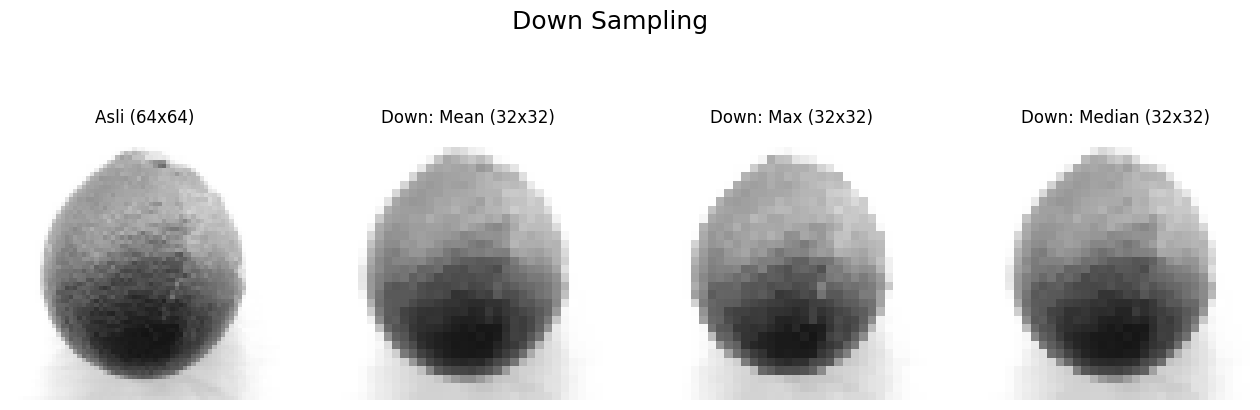

In [ ]:
plt.figure(figsize=(16, 12))
plt.suptitle("Down Sampling", fontsize=18)

# 1. Asli 64x64
plt.subplot(3, 4, 1)
plt.imshow(img_64x64, cmap='gray', vmin=0, vmax=255)
plt.title("Asli (64x64)")
plt.axis('off')

# 2. Down: Mean
plt.subplot(3, 4, 2)
plt.imshow(down_mean, cmap='gray', vmin=0, vmax=255)
plt.title("Down: Mean (32x32)")
plt.axis('off')

# 3. Down: Max
plt.subplot(3, 4, 3)
plt.imshow(down_max, cmap='gray', vmin=0, vmax=255)
plt.title("Down: Max (32x32)")
plt.axis('off')

# 4. Down: Median
plt.subplot(3, 4, 4)
plt.imshow(down_median, cmap='gray', vmin=0, vmax=255)
plt.title("Down: Median (32x32)")
plt.axis('off')

### b. Visualisasi DownSampling

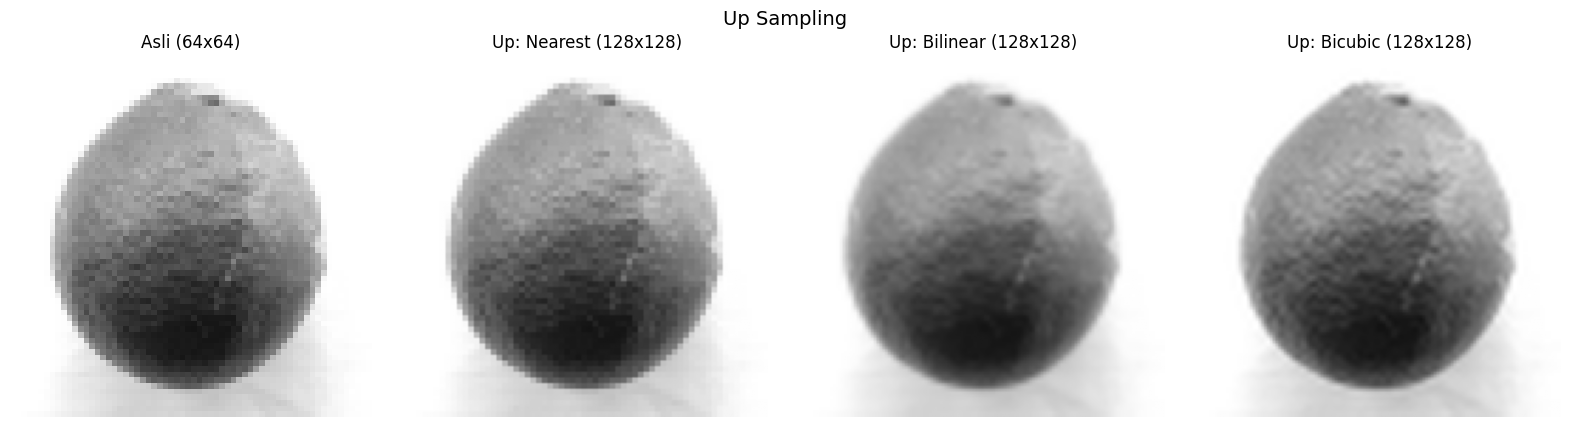

In [ ]:
plt.figure(figsize=(16, 12))
plt.suptitle("Up Sampling", fontsize=14)

# 1. Asli 64x64
plt.subplot(3, 4, 1)
plt.imshow(img_64x64, cmap='gray', vmin=0, vmax=255)
plt.title("Asli (64x64)")
plt.axis('off')

# 2. Up: Nearest
plt.subplot(3, 4, 2)
plt.imshow(up_nearest, cmap='gray', vmin=0, vmax=255)
plt.title("Up: Nearest (128x128)")
plt.axis('off')

# 3. Up: Bilinear
plt.subplot(3, 4, 3)
plt.imshow(up_bilinear, cmap='gray', vmin=0, vmax=255)
plt.title("Up: Bilinear (128x128)")
plt.axis('off')

# 4. Up: Bicubic
plt.subplot(3, 4, 4)
plt.imshow(up_bicubic, cmap='gray', vmin=0, vmax=255)
plt.title("Up: Bicubic (128x128)")
plt.axis('off')

plt.tight_layout()
plt.show()